# Boot

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io
import scipy
import seaborn as sns
import os
import pickle
import copy
import bootstrapped.bootstrap as bs
import bootstrapped.compare_functions as bs_compare
import bootstrapped.stats_functions as bs_stats
import scipy.stats as st

All voxels to all ROI centroid distances

In [2]:
p = np.load('/Users/jenniferthem/Masterthesis_Data/January2020/voxel_all_centroids_placebo', allow_pickle=True)
b_p = np.load('/Users/jenniferthem/Masterthesis_Data/January2020/voxel_all_centroids_baseline_p', allow_pickle=True)
k = np.load('/Users/jenniferthem/Masterthesis_Data/January2020/voxel_all_centroids_ketamine', allow_pickle=True)
b_k = np.load('/Users/jenniferthem/Masterthesis_Data/January2020/voxel_all_centroids_baseline_ket', allow_pickle=True)
roi_labels = np.load('/Users/jenniferthem/Masterthesis_Data/roi_labels.npy', allow_pickle=True)

In [3]:
roi_list = []
for i in range(len(roi_labels)):
    roi_list.append(copy.deepcopy(roi_labels[i][0]))

In [4]:
# label the voxels
p['label']= roi_list
b_p['label']= roi_list
k['label']= roi_list
b_k['label']= roi_list

In [5]:
rois = ['OFC1','OFC2','OFC3','OFC4','OFC5','OFC6','OFC7','s32','FP2','25','s24','33','p32','p24ab','p24c','Putamen','NAcc','Caudate']


Extract only s24 and s32 voxels

In [6]:
s24_b_k = b_k[b_k['label']=='s24'].drop(['label'], axis=1)
s24_k = k[k['label']=='s24'].drop(['label'], axis=1)
s24_p = p[p['label']=='s24'].drop(['label'], axis=1)
s24_b_p = b_p[b_p['label']=='s24'].drop(['label'], axis=1)

In [7]:
s32_b_k = b_k[b_k['label']=='s32'].drop(['label'], axis=1)
s32_k = k[k['label']=='s32'].drop(['label'], axis=1)
s32_p = p[p['label']=='s32'].drop(['label'], axis=1)
s32_b_p = b_p[b_p['label']=='s32'].drop(['label'], axis=1)

In [10]:
s24_k

,OFC1,OFC2,OFC3,OFC4,OFC5,OFC6,OFC7,s32,FP2,25,s24,33,p32,p24ab,p24c,Putamen,NAcc,Caudate
1705,0.776762,0.578176,2.031708,5.058132,4.092635,6.678424,5.855856,4.444736,7.758234,0.833090,4.476386,4.975876,9.128997,8.364600,9.185896,6.778988,5.598307,5.852294
1732,0.732571,0.710463,2.169211,5.192759,4.226784,6.812499,5.991702,4.322229,7.631822,0.977069,4.356738,4.880075,9.010484,8.249385,9.071360,6.828831,5.701689,5.974919
2214,0.933518,0.169455,1.598132,4.626192,3.661235,6.246858,5.422944,4.864698,8.182513,0.416410,4.892333,5.350208,9.541754,8.772167,9.592141,6.766826,5.401107,5.573823
2232,0.893732,0.348058,1.778109,4.807756,3.843252,6.428634,5.603508,4.680373,7.998594,0.571089,4.707860,5.170601,9.357329,8.588016,9.408101,6.716873,5.432259,5.645494
2233,0.876127,0.603400,2.037499,5.067845,4.103607,6.688819,5.862942,4.419962,7.737803,0.818757,4.448136,4.924673,9.098457,8.330488,9.150969,6.679209,5.510864,5.777531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5768,7.894052,8.285278,9.685732,12.699926,11.748911,14.315150,13.472549,3.275201,0.691094,8.450306,3.235276,3.127317,1.422568,0.777725,1.560499,8.936698,10.388591,11.418974
6015,1.470500,0.565682,0.942940,3.973492,3.012189,5.594625,4.765057,5.497504,8.821314,0.295342,5.517631,5.904520,10.156204,9.377229,10.194092,6.715698,5.071846,5.113738
6016,1.657025,0.782992,0.716623,3.745563,2.785120,5.366610,4.536361,5.723901,9.048257,0.521311,5.742913,6.116135,10.379007,9.598325,10.414480,6.752408,5.012582,5.000881
6021,1.034897,0.158664,1.307037,4.324926,3.358778,5.944413,5.124752,5.179360,8.494642,0.312854,5.208723,5.669548,9.859383,9.091003,9.911228,6.909092,5.410310,5.509087


In [22]:
s24_k.drop(['label'], axis=1)
s24_b_k.drop(['label'], axis=1)

KeyError: "['label'] not found in axis"

Calculate the differences between ketamine-baseline, placebo-baseline (main effect) and ketamine-placebo (interaction)

In [14]:
# ketamine - baseline
s24_k_sub_b = s24_k - s24_b_k
# placebo - baseline
s24_p_sub_b = s24_p - s24_b_p
# (ketamine-b) - (placebo-b)
s24_k_p = s24_k_sub_b - s24_p_sub_b

In [15]:
# ketamine - baseline
s32_k_sub_b = s32_k - s32_b_k
# placebo - baseline
s32_p_sub_b = s32_p - s32_b_p
# (ketamine-b) - (placebo-b)
s32_k_p = s32_k_sub_b - s32_p_sub_b

Extract the ROI centroids from whole matrix

In [16]:
ofc1_s24 = np.asarray(s24_k_p['OFC1'] )
ofc2_s24 = np.asarray(s24_k_p['OFC2'] )
ofc3_s24 = np.asarray(s24_k_p['OFC3'] )
ofc4_s24 = np.asarray(s24_k_p['OFC4'] )
ofc5_s24 = np.asarray(s24_k_p['OFC5'] )
ofc6_s24 = np.asarray(s24_k_p['OFC6'] )
ofc7_s24 = np.asarray(s24_k_p['OFC6'] )
s32_s24 = np.asarray(s24_k_p['s32'])
fp2_s24 = np.asarray(s24_k_p['FP2'] ) 
r25_s24 = np.asarray(s24_k_p['25'] )
s24_s24 = np.asarray(s24_k_p['s24'])
r33_s24 = np.asarray(s24_k_p['33'] )
p32_s24 = np.asarray(s24_k_p['p32'] )
p24ab_s24 = np.asarray(s24_k_p['p24ab']) 
p24c_s24 = np.asarray(s24_k_p['p24c'] )
putamen_s24 = np.asarray(s24_k_p['Putamen']) 
nacc_s24 = np.asarray(s24_k_p['NAcc'] )
caudate_s24 = np.asarray(s24_k_p['Caudate']) 

In [17]:
ofc1_s32 = np.asarray(s32_k_p['OFC1'] )
ofc2_s32 = np.asarray(s32_k_p['OFC2'] )
ofc3_s32 = np.asarray(s32_k_p['OFC3'] )
ofc4_s32 = np.asarray(s32_k_p['OFC4'] )
ofc5_s32 = np.asarray(s32_k_p['OFC5'] )
ofc6_s32 = np.asarray(s32_k_p['OFC6'] )
ofc7_s32 = np.asarray(s32_k_p['OFC6'] )
s32_s32 = np.asarray(s32_k_p['s32'])
fp2_s32 = np.asarray(s32_k_p['FP2'] ) 
r25_s32 = np.asarray(s32_k_p['25'] )
s24_s32 = np.asarray(s32_k_p['s24'])
r33_s32 = np.asarray(s32_k_p['33'] )
p32_s32 = np.asarray(s32_k_p['p32'] )
p24ab_s32 = np.asarray(s32_k_p['p24ab']) 
p24c_s32 = np.asarray(s32_k_p['p24c'] )
putamen_s32 = np.asarray(s32_k_p['Putamen']) 
nacc_s32 = np.asarray(s32_k_p['NAcc'] )
caudate_s32 = np.asarray(s32_k_p['Caudate']) 

Extract the striatum values from ketamine-baseline and placebo-baseline

In [18]:
putamen_s24_k = np.asarray(s24_k_sub_b['Putamen']) 
putamen_s24_p = np.asarray(s24_p_sub_b['Putamen']) 

nacc_s24_k = np.asarray(s24_k_sub_b['NAcc'] )
nacc_s24_p = np.asarray(s24_p_sub_b['NAcc'] )

caudate_s24_k = np.asarray(s24_k_sub_b['Caudate'])
caudate_s24_p = np.asarray(s24_p_sub_b['Caudate']) 

In [19]:
putamen_s32_k = np.asarray(s32_k_sub_b['Putamen']) 
putamen_s32_p = np.asarray(s32_p_sub_b['Putamen']) 

nacc_s32_k = np.asarray(s32_k_sub_b['NAcc'] )
nacc_s32_p = np.asarray(s32_p_sub_b['NAcc'] )

caudate_s32_k = np.asarray(s32_k_sub_b['Caudate'])
caudate_s32_p = np.asarray(s32_p_sub_b['Caudate']) 

In [20]:
def calculate_bootstrap(data):
    
    # Bootstrap returns mean of the 50000 bootstrap iterations
    bsr = bs.bootstrap(data, stat_func=bs_stats.mean, alpha=0.05, num_iterations=50000, return_distribution=True)
    # get the mean of the bootstrap from all rois
    # then get a matrix / heatmap for this results to further see which regions to choose for
    # further analysis
    bsr_mean = np.mean(bsr)


    return bsr, bsr_mean
    

In [21]:
list_roi_s24 = [ofc1_s24, ofc2_s24, ofc3_s24, ofc4_s24, ofc5_s24, ofc6_s24, ofc7_s24, s32_s24, fp2_s24, r25_s24, s24_s24, r33_s24, p32_s24, p24ab_s24, p24c_s24, putamen_s24, nacc_s24,caudate_s24]
list_roi_s32 = [ofc1_s32, ofc2_s32, ofc3_s32, ofc4_s32, ofc5_s32, ofc6_s32, ofc7_s32, s32_s32, fp2_s32, r25_s32, s24_s32, r33_s32, p32_s32, p24ab_s32, p24c_s32, putamen_s32, nacc_s32,caudate_s32]

Bootstrapped mean

In [112]:
list_boot_results_s24 = []
for entry in list_roi_s24:
    [bsr, bsr_mean] = calculate_bootstrap(entry)
    list_boot_results_s24.append(bsr_mean)

In [113]:
list_boot_results_s32 = []
for entry in list_roi_s32:
    [bsr, bsr_mean] = calculate_bootstrap(entry)
    list_boot_results_s32.append(bsr_mean)

In [133]:
s24 = pd.DataFrame(list_boot_results_s24, index=rois, columns=['s24_Ketamine-Placebo'])
s32= pd.DataFrame(list_boot_results_s32, index=rois, columns=['s32_Ketamine-Placebo'])

In [134]:
s24

,s24_Ketamine-Placebo
OFC1,2.110030
OFC2,1.582856
OFC3,1.746329
OFC4,1.971061
OFC5,1.984258
OFC6,2.559777
OFC7,2.560956
s32,1.170219
FP2,0.198519
25,1.449896


In [132]:
s32

,Ketamine-Placebo
OFC1,1.769858
OFC2,1.282166
OFC3,1.412247
OFC4,1.593563
OFC5,1.613194
OFC6,2.123482
OFC7,2.123379
s32,1.101478
FP2,0.394113
25,1.116023


In [135]:
df = pd.concat([s24, s32], axis=1)

In [136]:
df

,s24_Ketamine-Placebo,s32_Ketamine-Placebo
OFC1,2.110030,1.769858
OFC2,1.582856,1.282166
OFC3,1.746329,1.412247
OFC4,1.971061,1.593563
OFC5,1.984258,1.613194
OFC6,2.559777,2.123482
OFC7,2.560956,2.123379
s32,1.170219,1.101478
FP2,0.198519,0.394113
25,1.449896,1.116023


<IPython.core.display.Javascript object>


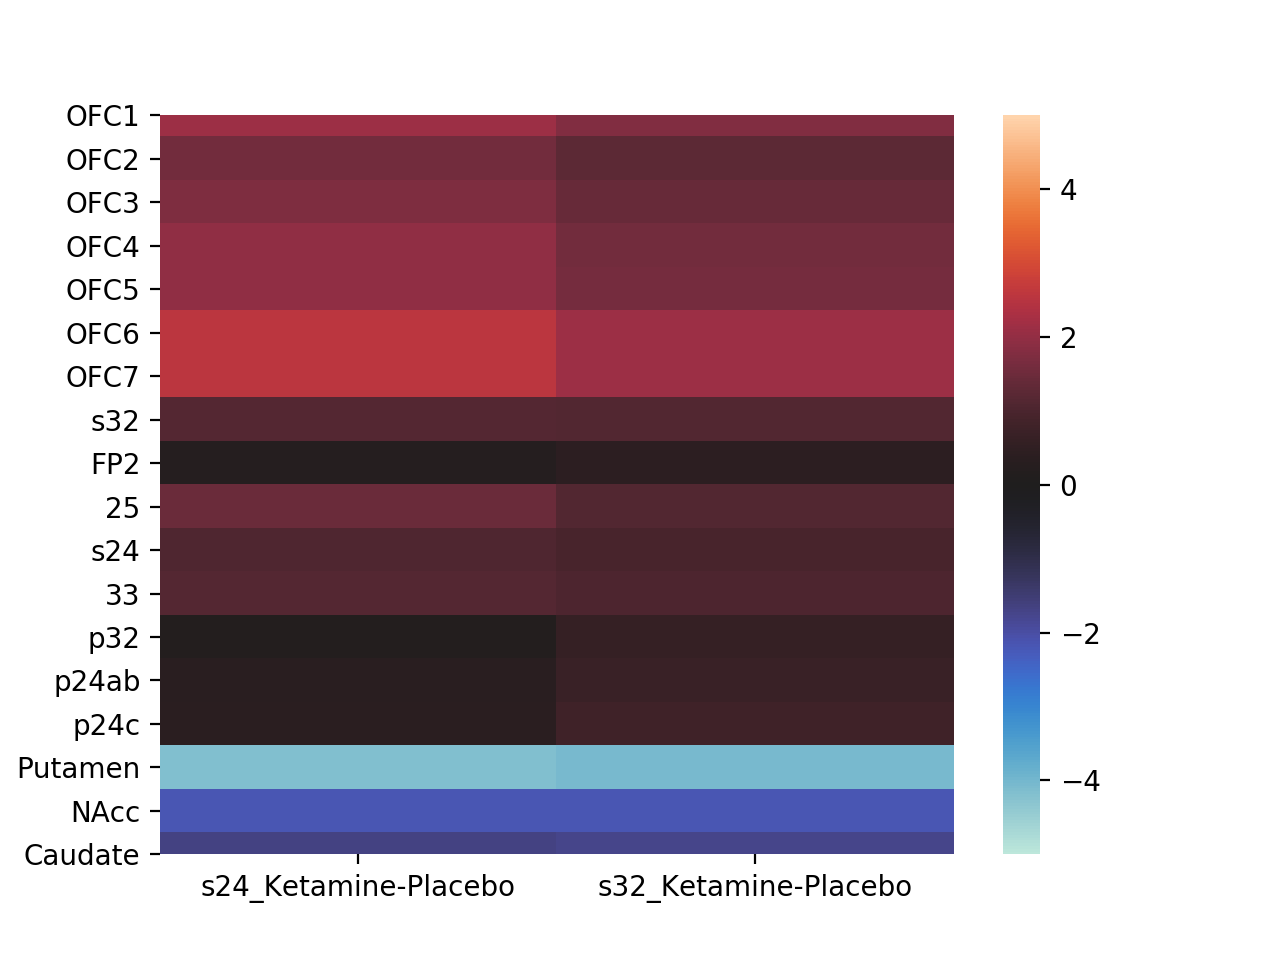

In [141]:
%matplotlib notebook
sns.heatmap(df, vmin=-5, vmax=5, center=0)
plt.savefig('/Users/jenniferthem/Masterthesis_Data/Bootstrap/bootstrap_mean_s24s32_heatmap', dpi=250)

In [23]:
[bsr_s24_putamen, bsr_mean_s24_putamen] = calculate_bootstrap(putamen_s24)
[bsr_s24_nacc, bsr_mean_s24_nacc] = calculate_bootstrap(nacc_s24)
[bsr_s24_caudate, bsr_mean_s24_caudate] = calculate_bootstrap(caudate_s24)

In [24]:
[bsr_s32_putamen, bsr_mean_s32_putamen] = calculate_bootstrap(putamen_s32)
[bsr_s32_nacc, bsr_mean_s32_nacc] = calculate_bootstrap(nacc_s32)
[bsr_s32_caudate, bsr_mean_s32_caudate] = calculate_bootstrap(caudate_s32)

In [25]:
def plot_ket_placebo(bsr_com, roi):
    %matplotlib notebook
    
    save_name =  'Density_bootstrap_baselinesplit_comparison_baseline_' + str(roi) + '.png'
    keys = ['Ketamine', 'Placebo']
    # distplot: Flexibly plot a univariate distribution of observations - Probability density function
    
    
    for curr_key in keys:
    # Subset to the airline
        subset = bsr_com[curr_key]
        #plt.figure(figsize=(20,10))
        #fig = plt.subplots(figsize=(20,15))
        #Draw the density plot
        sns.distplot(subset, hist = False, kde = True,
                 kde_kws = {'linewidth': 1},
                 label = curr_key)
    
    # Plot formatting
    #fig.set_size_inches(18.5, 10.5)
    #fig.subplots(figsize=(20,15))
    plt.legend(prop={'size': 8}, title = 'Condition')
    plt.title(str(roi))
    plt.xlabel('Bootstrapped mean')
    plt.ylabel('Probibility density')
    plt.xlim(-1,1)
    plt.axvline(linewidth=1, linestyle='--',color='k')
    plt.savefig(os.path.join('/Users/jenniferthem/Masterthesis_Data/Bootstrap/', save_name), dpi=250)
    

In [26]:
def plot_interaction(bsr, title):
    # Plot Ketamine-Placebo
    %matplotlib notebook
    sns.distplot(bsr, hist = False, kde = True,
                 kde_kws = {'linewidth': 1}, color='green')
    
    plt.title(title)
    plt.xlabel('Bootstrapped mean')
    plt.ylabel('Probibility density')
    plt.xlim(-7,7)
    plt.axvline(linewidth=1, linestyle='--', color='k')
    plt.savefig(os.path.join('/Users/jenniferthem/Masterthesis_Data/Bootstrap/', title), dpi=250)

In [27]:
# bootstrapping for ketamine-baseline and placebo-baseline for striatum
[bsr_c_24_p, bsr_c_24_mean_p] = calculate_bootstrap(caudate_s24_p)
[bsr_c_24_k, bsr_c_24_mean_k] = calculate_bootstrap(caudate_s24_k)
[bsr_c_32_p, bsr_c_32_mean_p] = calculate_bootstrap(caudate_s32_p)
[bsr_c_32_k, bsr_c_32_mean_k] = calculate_bootstrap(caudate_s32_k)

[bsr_n_24_p, bsr_n_24_mean_p] = calculate_bootstrap(nacc_s24_p)
[bsr_n_24_k, bsr_n_24_mean_k] = calculate_bootstrap(nacc_s24_k)
[bsr_n_32_p, bsr_n_32_mean_p] = calculate_bootstrap(nacc_s32_p)
[bsr_n_32_k, bsr_n_32_mean_k] = calculate_bootstrap(nacc_s32_k)

[bsr_p_24_p, bsr_p_24_mean_p] = calculate_bootstrap(putamen_s24_p)
[bsr_p_24_k, bsr_p_24_mean_k] = calculate_bootstrap(putamen_s24_k)
[bsr_p_32_p, bsr_p_32_mean_p] = calculate_bootstrap(putamen_s32_p)
[bsr_p_32_k, bsr_p_32_mean_k] = calculate_bootstrap(putamen_s32_k)

In [28]:
bsr_c_24_k

array([-0.62133479, -0.59851245, -0.51681786, ..., -0.651212  ,
       -0.38838606, -0.62490138])

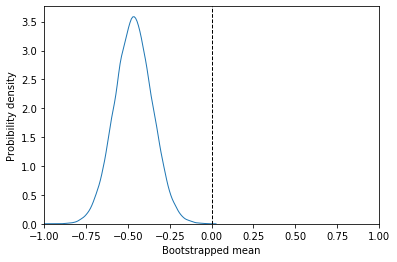

In [29]:
sns.distplot(bsr_c_24_k, hist = False, kde = True,
             kde_kws = {'linewidth': 1})
#plt.legend(prop={'size': 8}, title = 'Condition')
#plt.title(str(roi))
plt.xlabel('Bootstrapped mean')
plt.ylabel('Probibility density')
plt.xlim(-1,1)
plt.axvline(linewidth=1, linestyle='--',color='k')
plt.show()

<IPython.core.display.Javascript object>


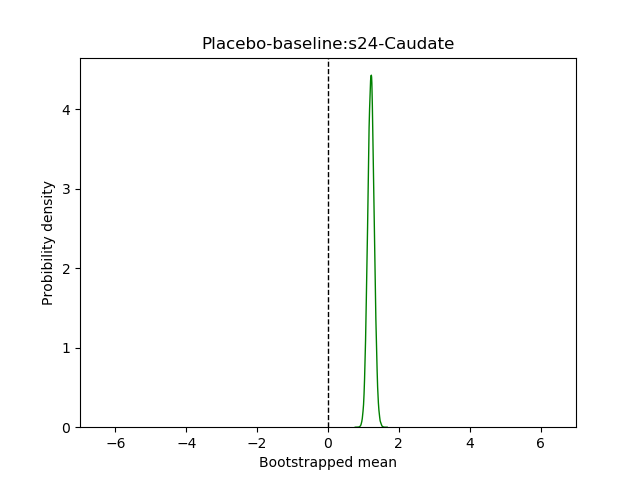

In [30]:
plot_interaction(bsr_c_24_p, 'Placebo-baseline:s24-Caudate')

<IPython.core.display.Javascript object>


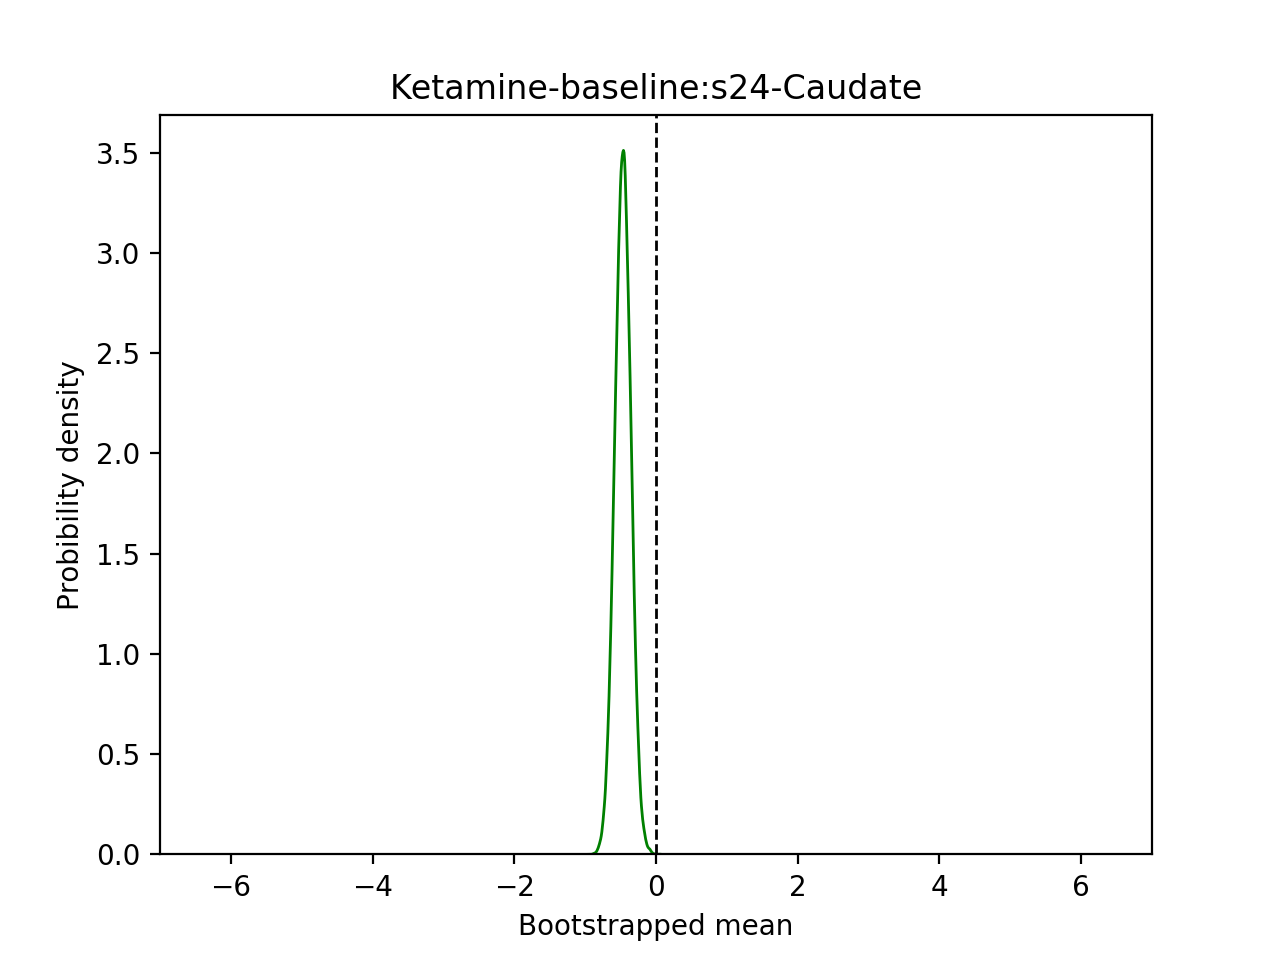

In [189]:
plot_interaction(bsr_c_24_k, 'Ketamine-baseline:s24-Caudate')

<IPython.core.display.Javascript object>


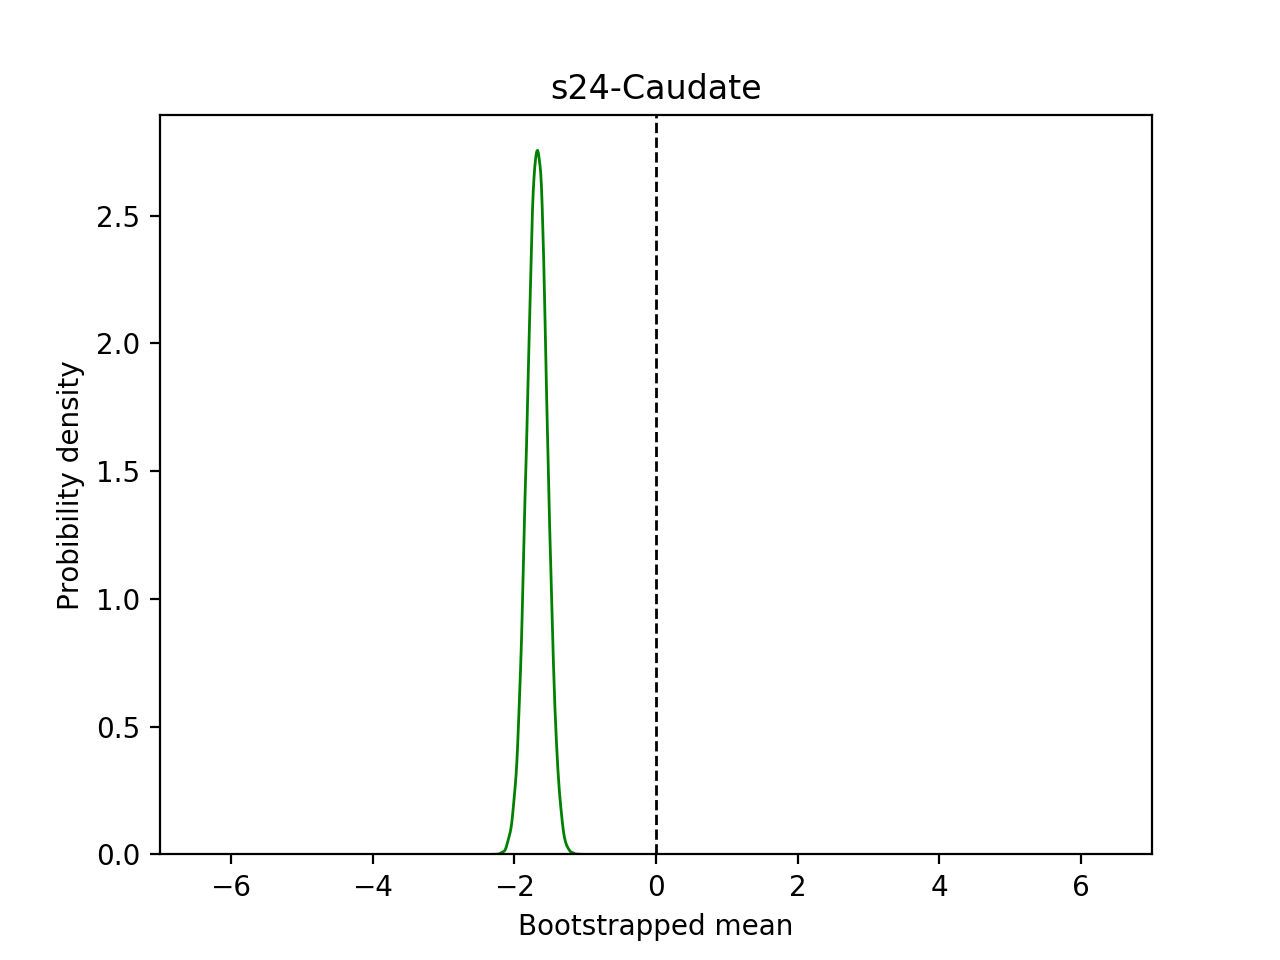

In [188]:
plot_interaction(bsr_s24_caudate, 's24-Caudate')

<IPython.core.display.Javascript object>


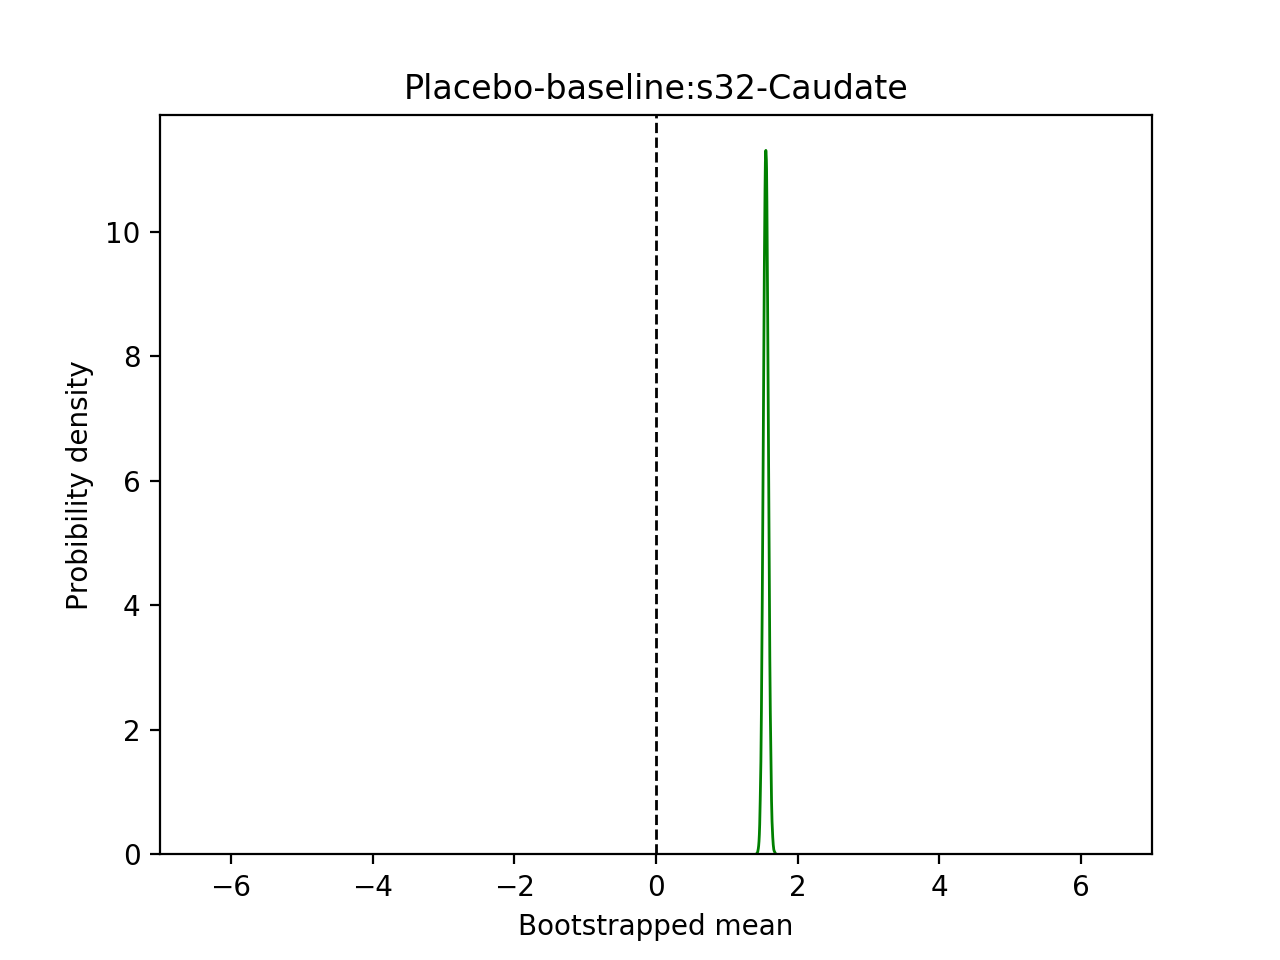

In [192]:
plot_interaction(bsr_c_32_p, 'Placebo-baseline:s32-Caudate')

## s32

<IPython.core.display.Javascript object>


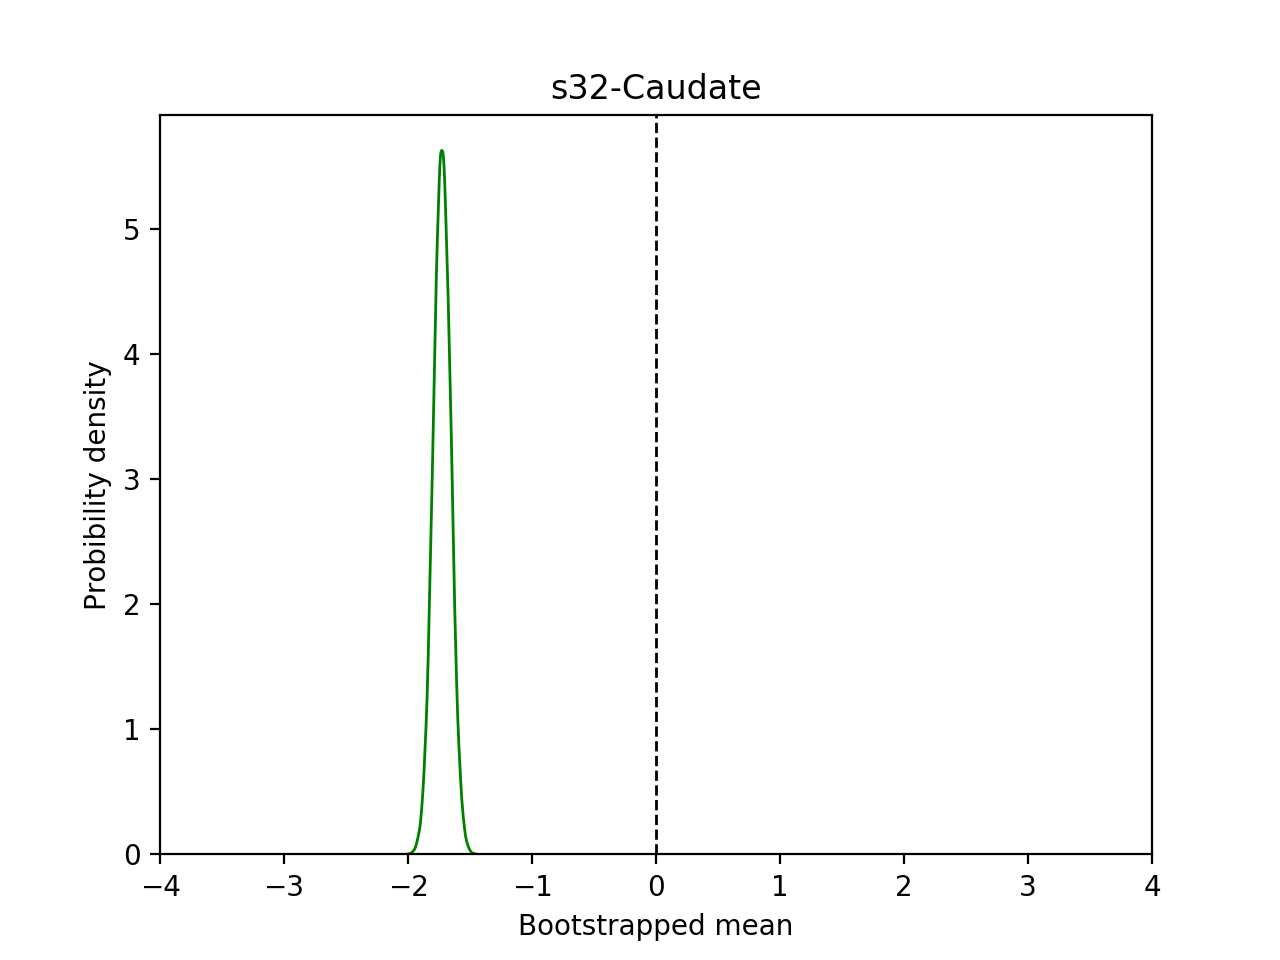

In [167]:
plot_interaction(bsr_s32_caudate, 's32-Caudate')

<IPython.core.display.Javascript object>


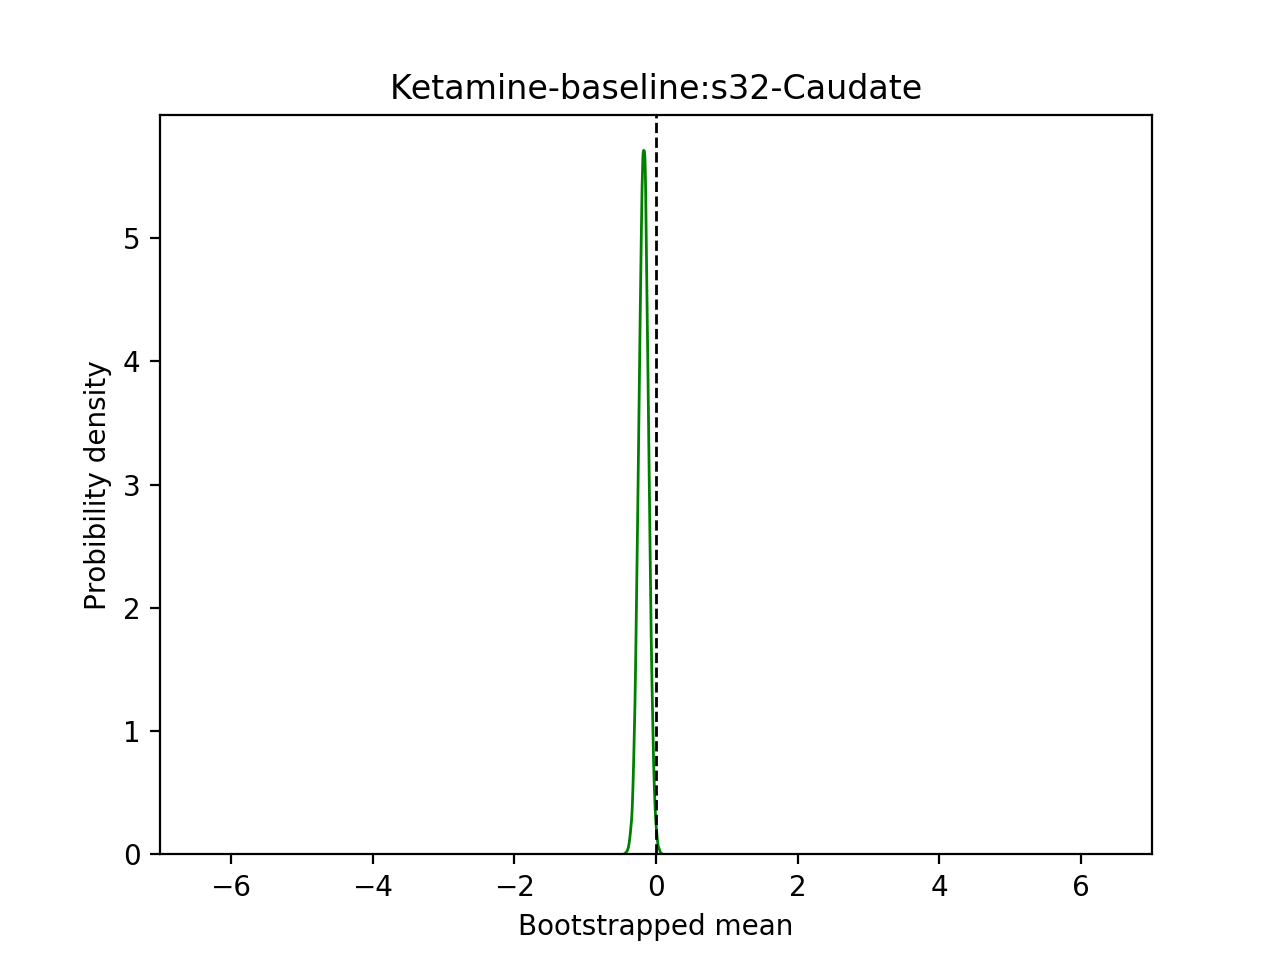

In [193]:
plot_interaction(bsr_c_32_k, 'Ketamine-baseline:s32-Caudate')

<IPython.core.display.Javascript object>


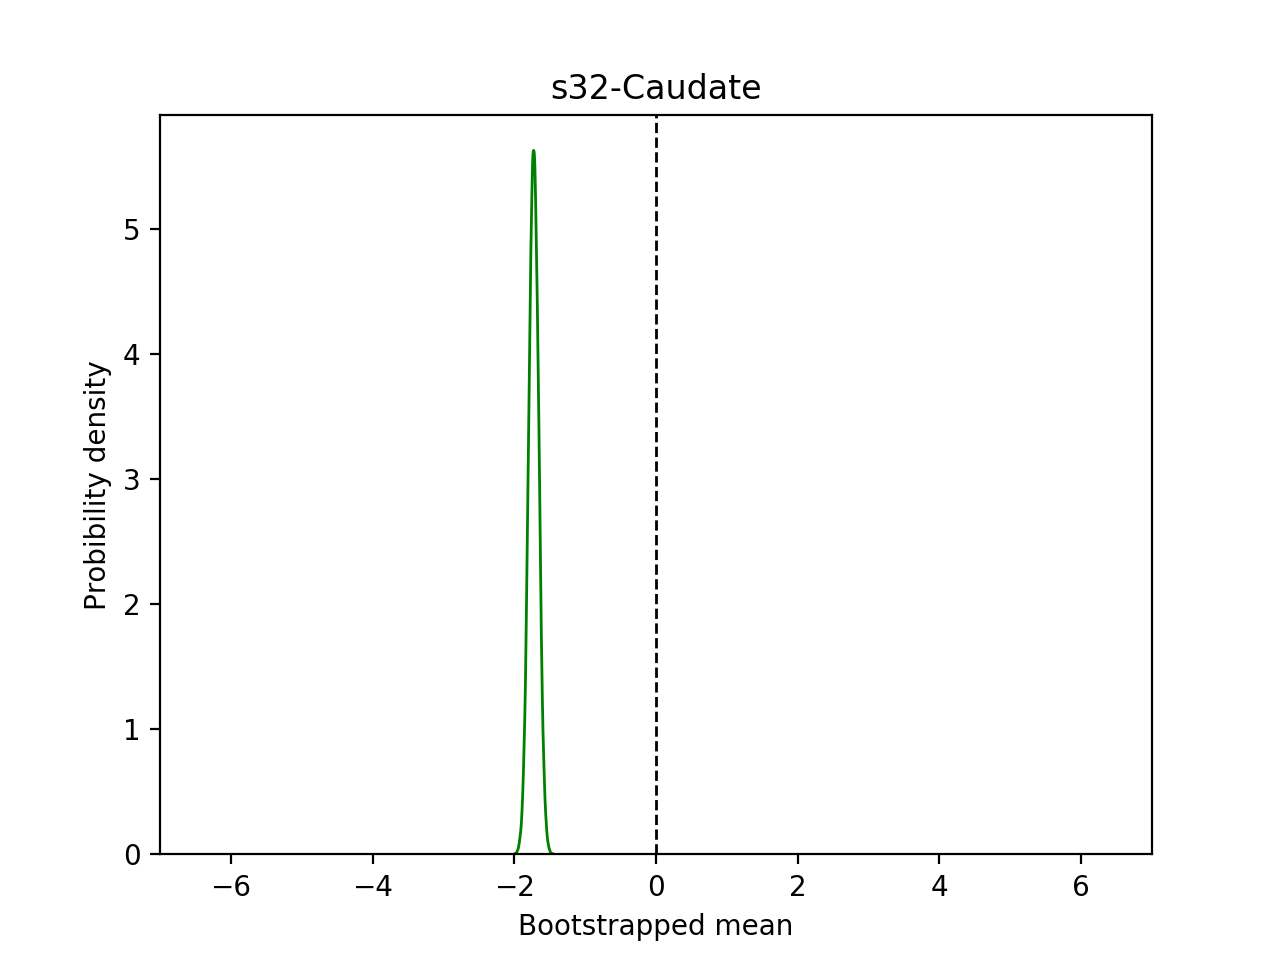

In [194]:
plot_interaction(bsr_s32_caudate, 's32-Caudate')

## Putamen

<IPython.core.display.Javascript object>


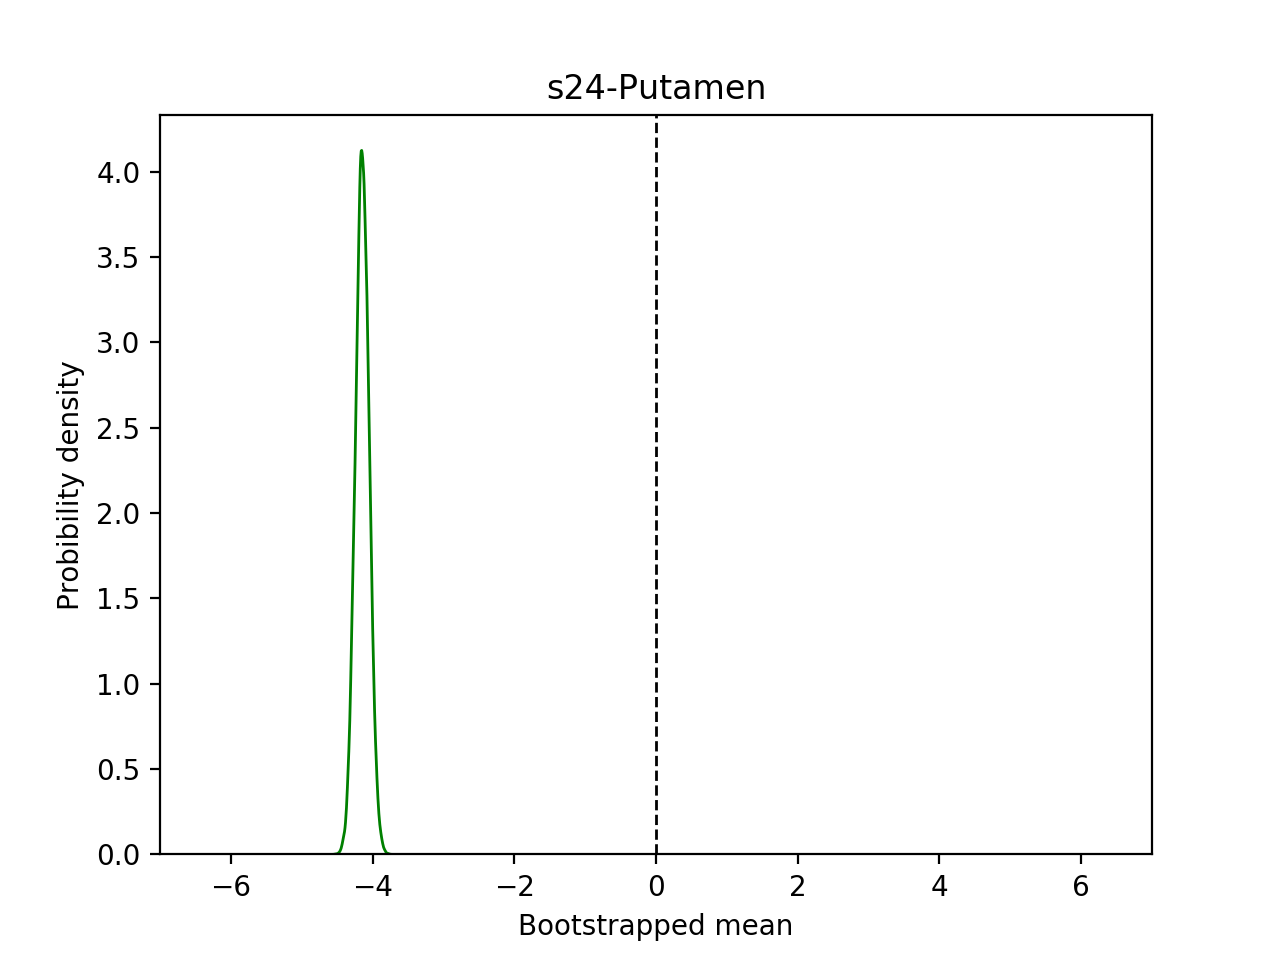

In [199]:
plot_interaction(bsr_s24_putamen, 's24-Putamen')

## s24

## NAcc

## s24

<IPython.core.display.Javascript object>


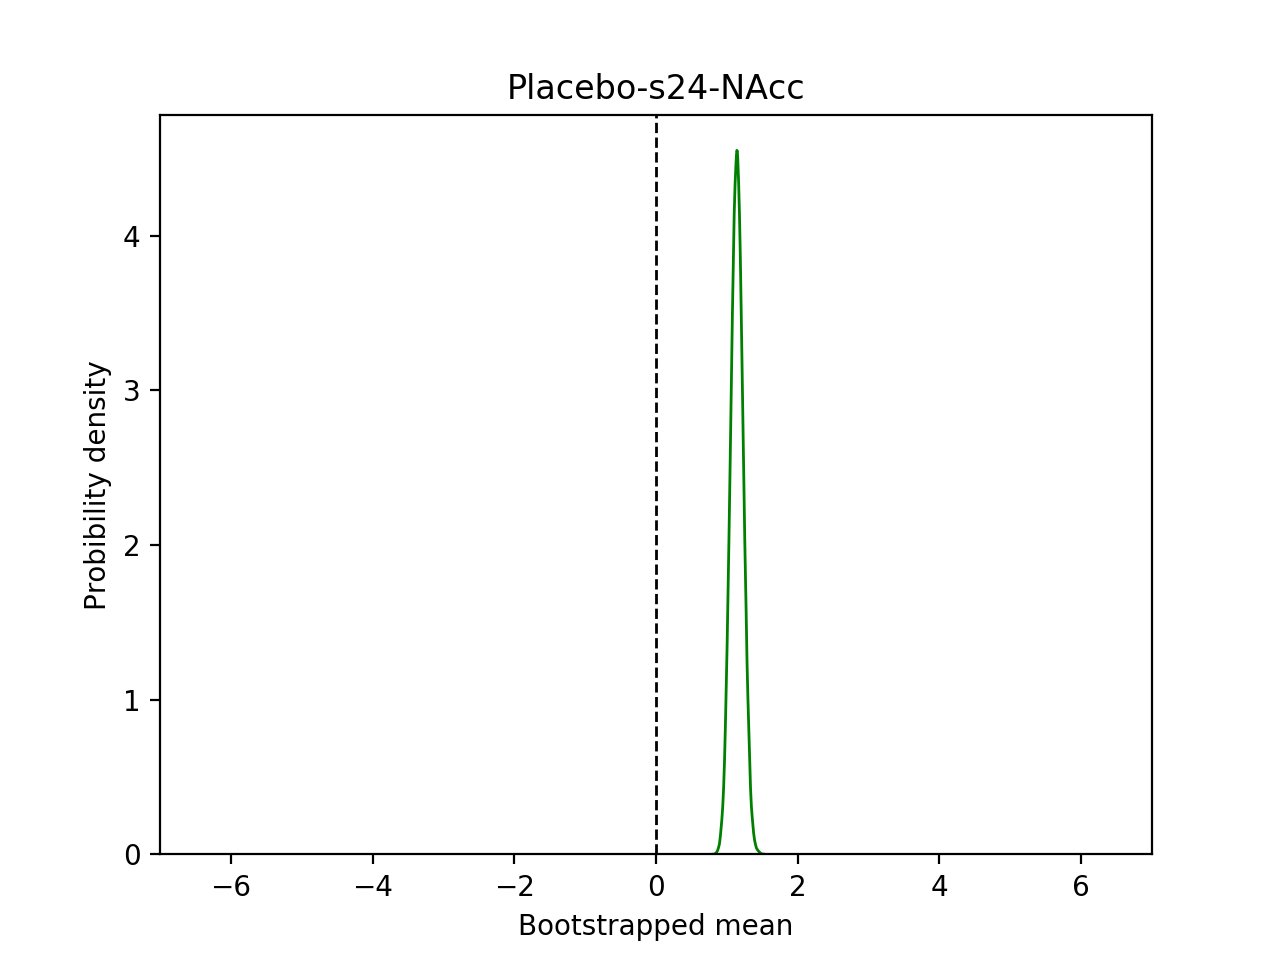

In [200]:
plot_interaction(bsr_n_24_p, 'Placebo-s24-NAcc')

<IPython.core.display.Javascript object>


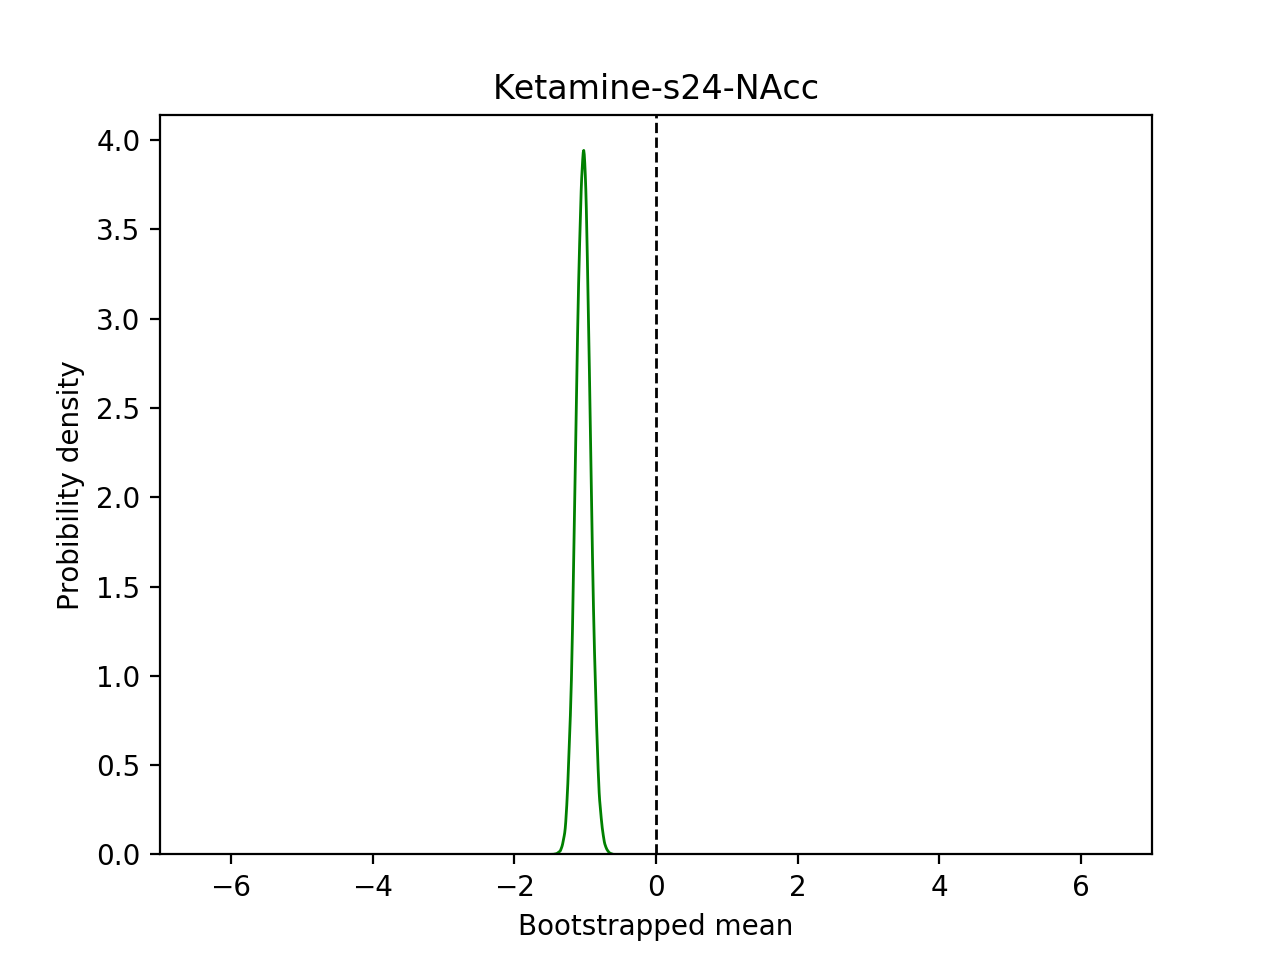

In [201]:
plot_interaction(bsr_n_24_k, 'Ketamine-s24-NAcc')

<IPython.core.display.Javascript object>


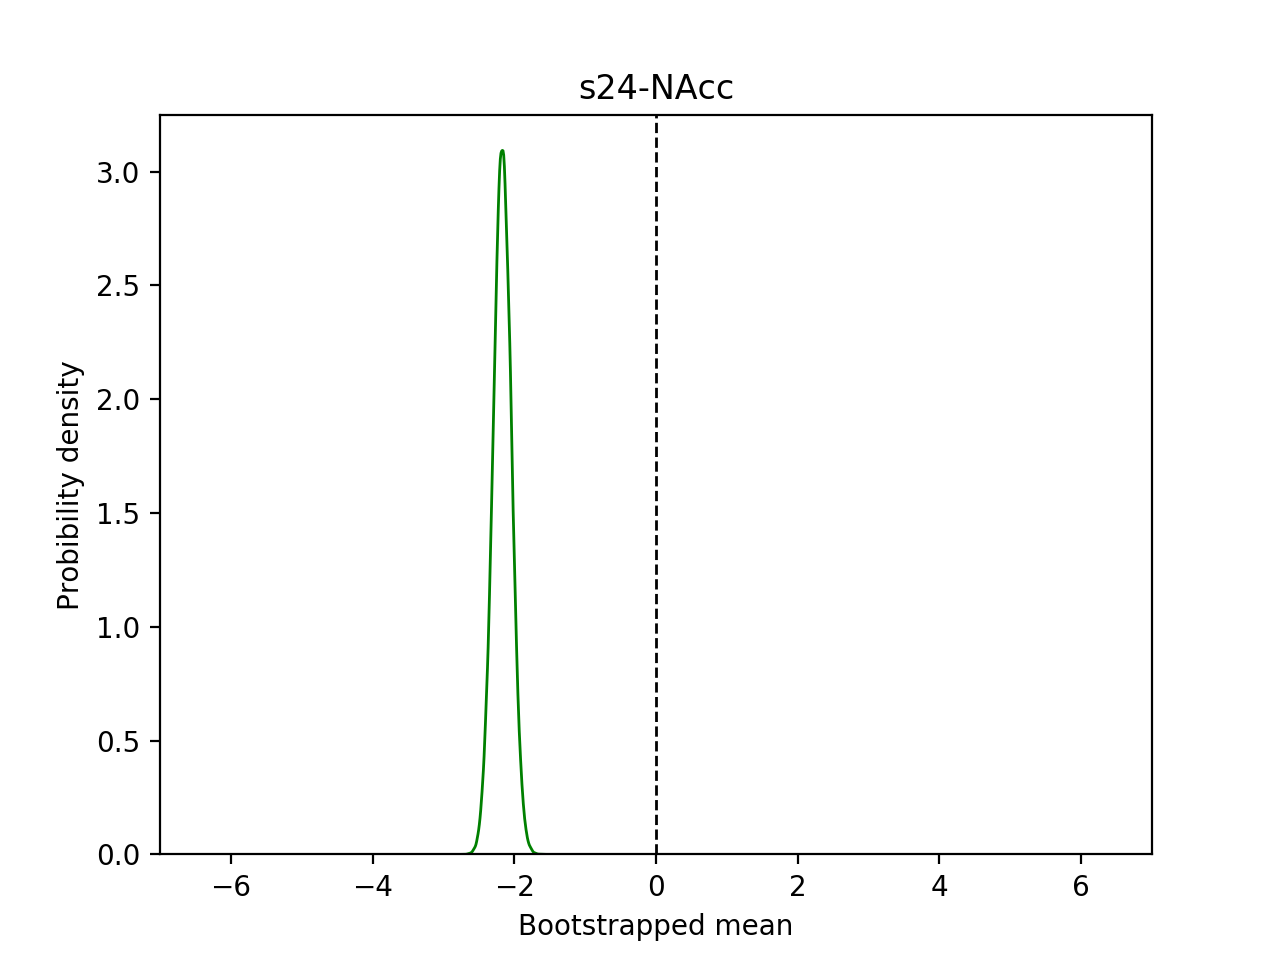

In [173]:
plot_interaction(bsr_s24_nacc, 's24-NAcc')

<IPython.core.display.Javascript object>


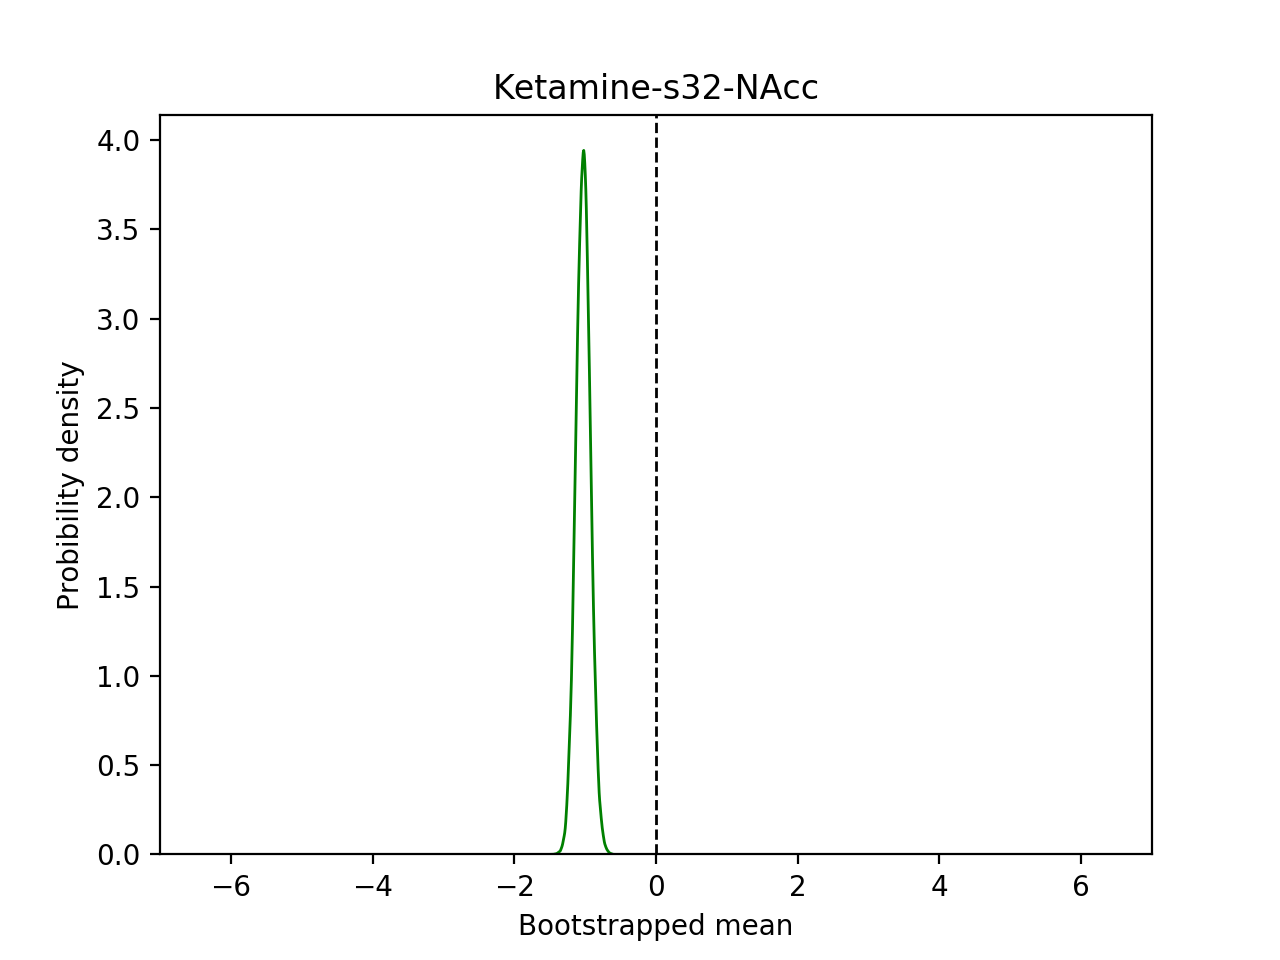

In [202]:
plot_interaction(bsr_n_24_k, 'Ketamine-s32-NAcc')

<IPython.core.display.Javascript object>


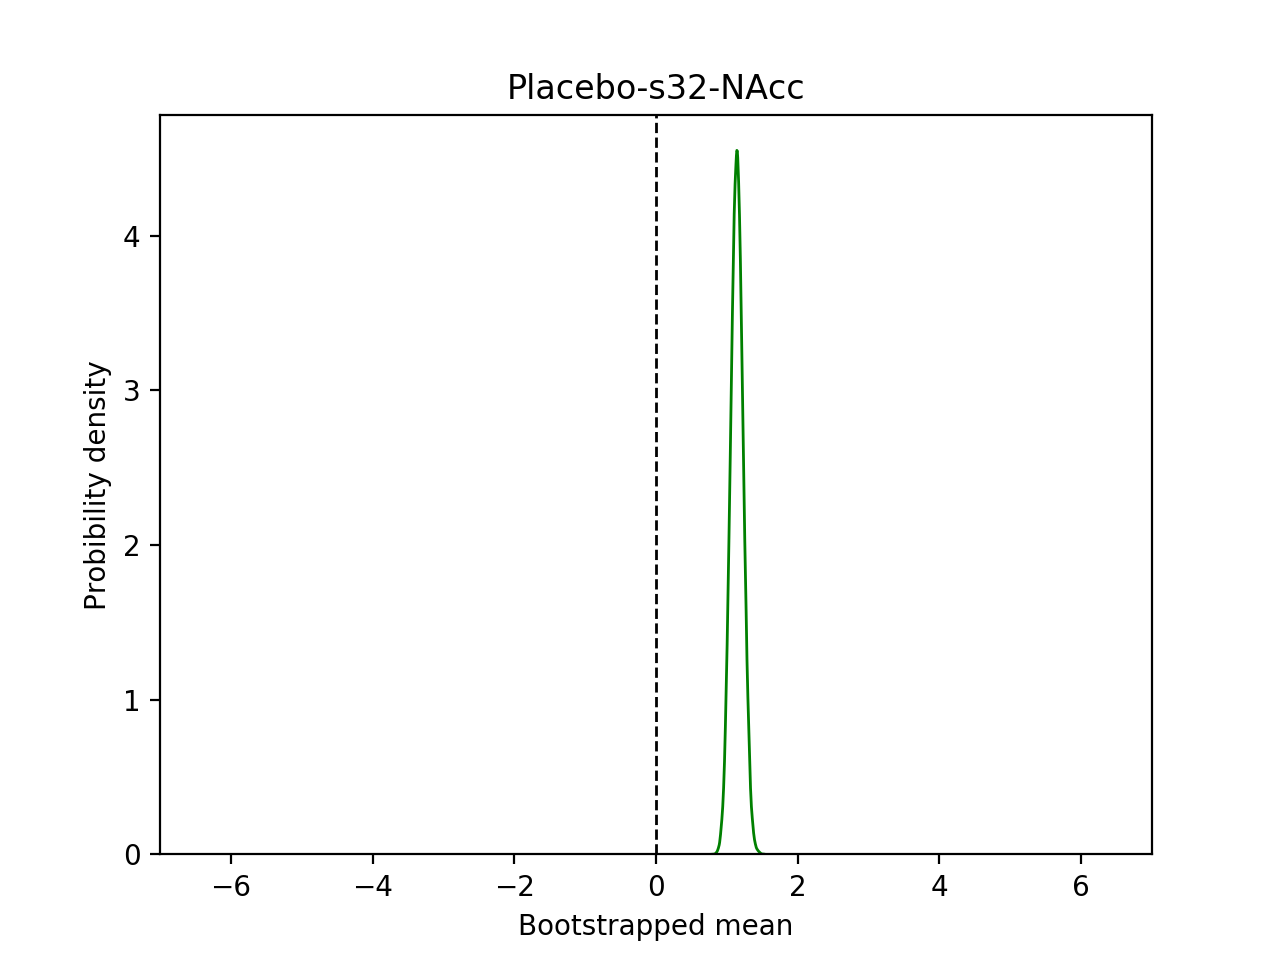

In [203]:
plot_interaction(bsr_n_24_p, 'Placebo-s32-NAcc')

<IPython.core.display.Javascript object>


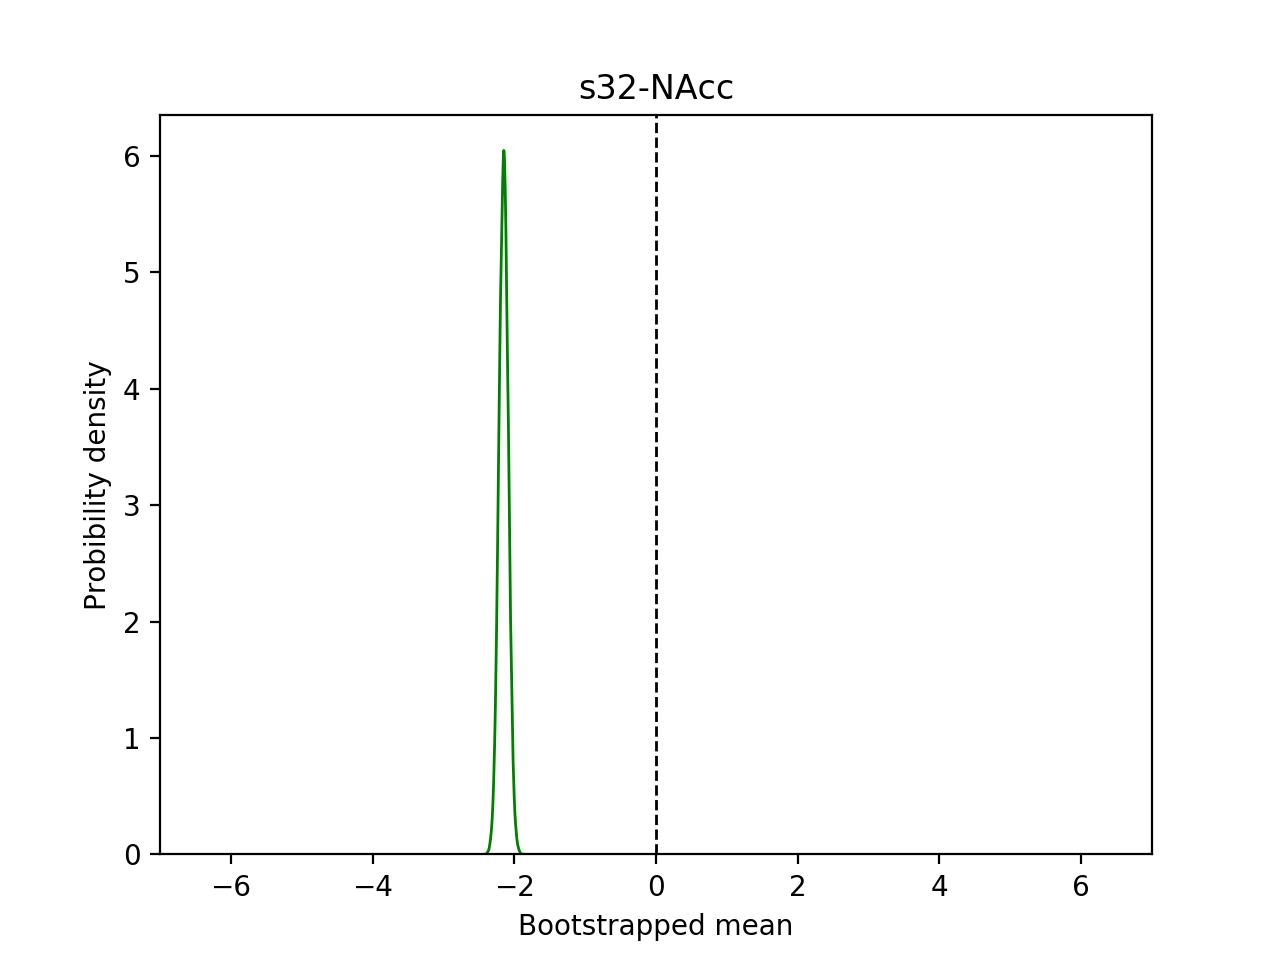

In [204]:
plot_interaction(bsr_s32_nacc, 's32-NAcc')